In [ ]:
# Mengimport Packages atau Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
# Menghubungkan Google Colab & Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [129]:
path = "/content/gdrive/MyDrive/Datamining/"

In [130]:
df = pd.read_csv(path + 'london_weather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [131]:
# Melihat data type dan sfesifik pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [132]:
# Dropping unnnecessart columns atau
# hapus data yang diperlukan karena keseluruhan data memiliki nilai kosong
columns_to_drop = ['snow_depth']
df.drop(columns=columns_to_drop, inplace=True)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0
...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0


In [133]:
# Renaming columns
df.rename(columns={
    'date': 'tanggal',
    'cloud_cover': 'tutupan awan',
    'sunshine': 'cahaya_matahari',
    'global_radiation': 'radiasi_global',
    'max_temp': 'suhu_tertinggi',
    'mean_temp': 'suhu_rata_rata',
    'min_temp': 'suhu_terendah',
    'precipitation': 'pengendapan',
    'pressure': 'tekanan'

}, inplace=True)
# Tampilan DataFrame setelah perubahan nama kolom
df

,tanggal,tutupan awan,cahaya_matahari,radiasi_global,suhu_tertinggi,suhu_rata_rata,suhu_terendah,pengendapan,tekanan
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0
...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0


In [144]:
# Mengambil statistik deskriptif dan mengubah ke bilangan bulat
descriptive_stats = df.describe().astype(int)

# Menampilkan statistik deskriptif dalam bentuk tabel
print(descriptive_stats.to_string())


        tanggal  tutupan awan  cahaya_matahari  radiasi_global  suhu_tertinggi  suhu_rata_rata  suhu_terendah  pengendapan  tekanan
count     15341         15322            15341           15322           15335           15305          15339        15335    15337
mean   19995671             5                4             118              15              11              7            1   101536
std      121217             2                4              88               6               5              5            3     1049
min    19790101             0                0               8              -6              -7            -11            0    95960
25%    19890702             4                0              41              10               7              3            0   100920
50%    20000101             6                3              95              15              11              7            0   101620
75%    20100702             7                7             186              

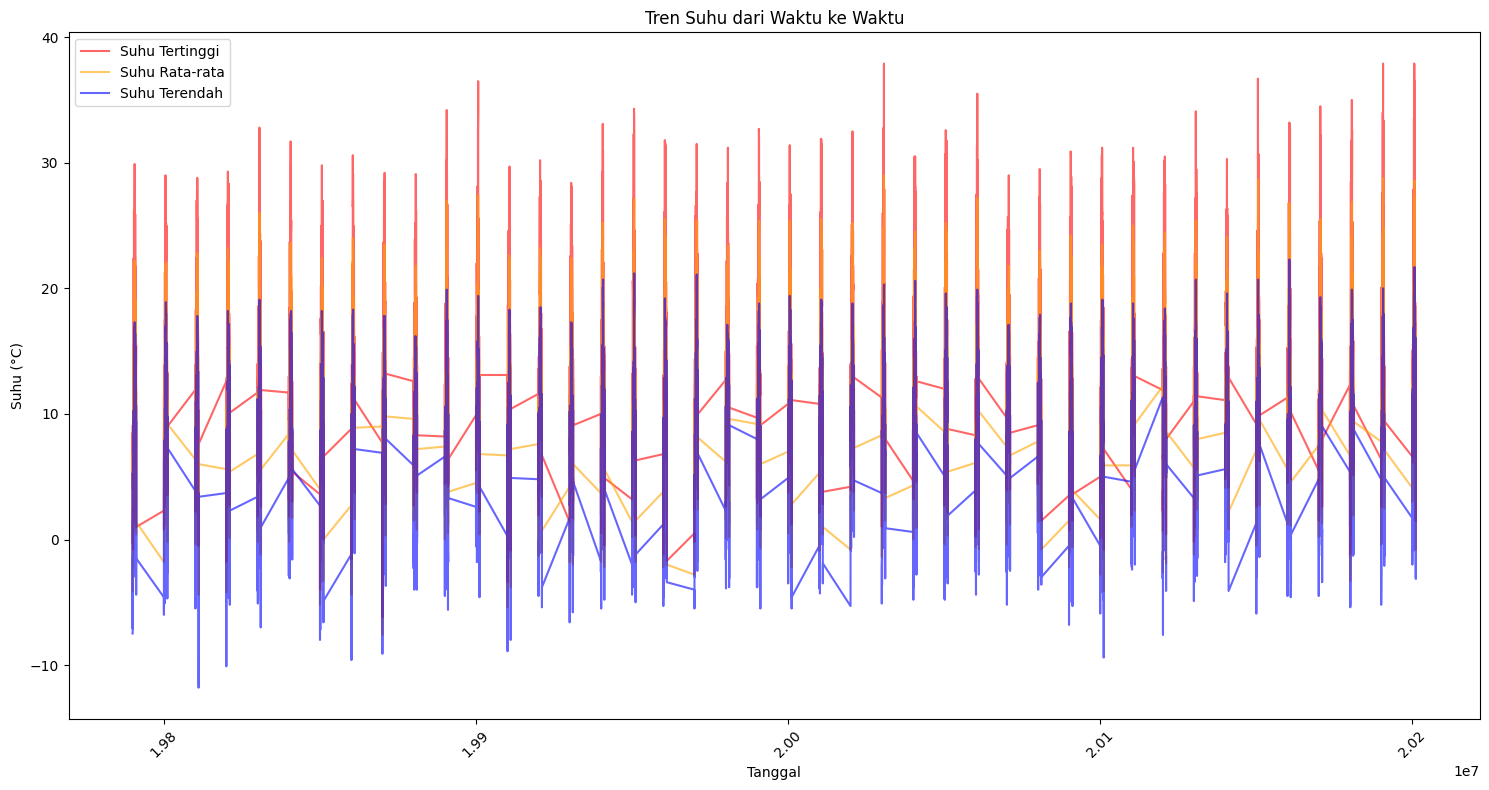

In [135]:
# 1. Line Plot (Suhu tertinggi, suhu rata-rata, dan suhu terendah dari waktu ke waktu)
plt.figure(figsize=(15, 8))  # Ukuran grafik diperbesar
plt.plot(df['date'], df['suhu_tertinggi'], label='Suhu Tertinggi', color='red', alpha=0.6)
plt.plot(df['date'], df['suhu_rata_rata'], label='Suhu Rata-rata', color='orange', alpha=0.6)
plt.plot(df['date'], df['suhu_terendah'], label='Suhu Terendah', color='blue', alpha=0.6)
plt.xlabel('date')
plt.ylabel('Suhu (°C)')
plt.title('Tren Suhu dari Waktu ke Waktu')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

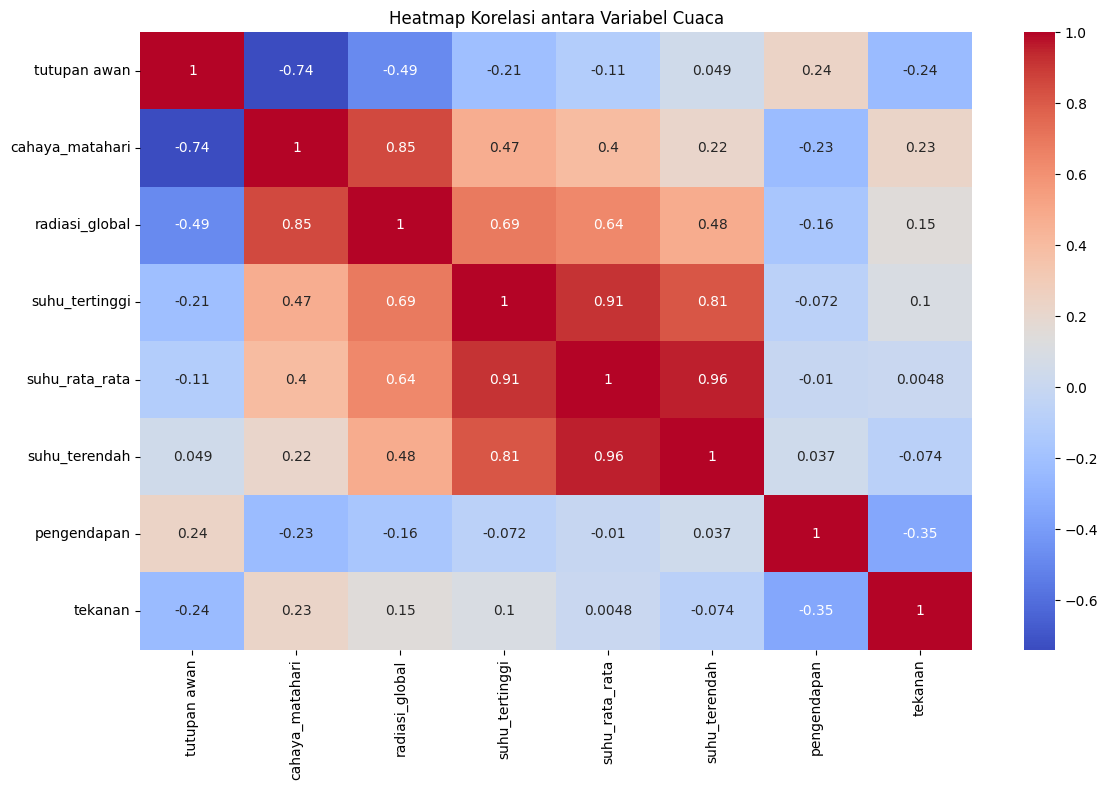

In [136]:
# 3. Heatmap (Korelasi antara variabel cuaca)
plt.figure(figsize=(12, 8))  # Memperbesar heatmap
sns.heatmap(df[['tutupan awan', 'cahaya_matahari', 'radiasi_global', 'suhu_tertinggi', 'suhu_rata_rata', 'suhu_terendah', 'pengendapan', 'tekanan']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antara Variabel Cuaca')
plt.tight_layout()
plt.show()


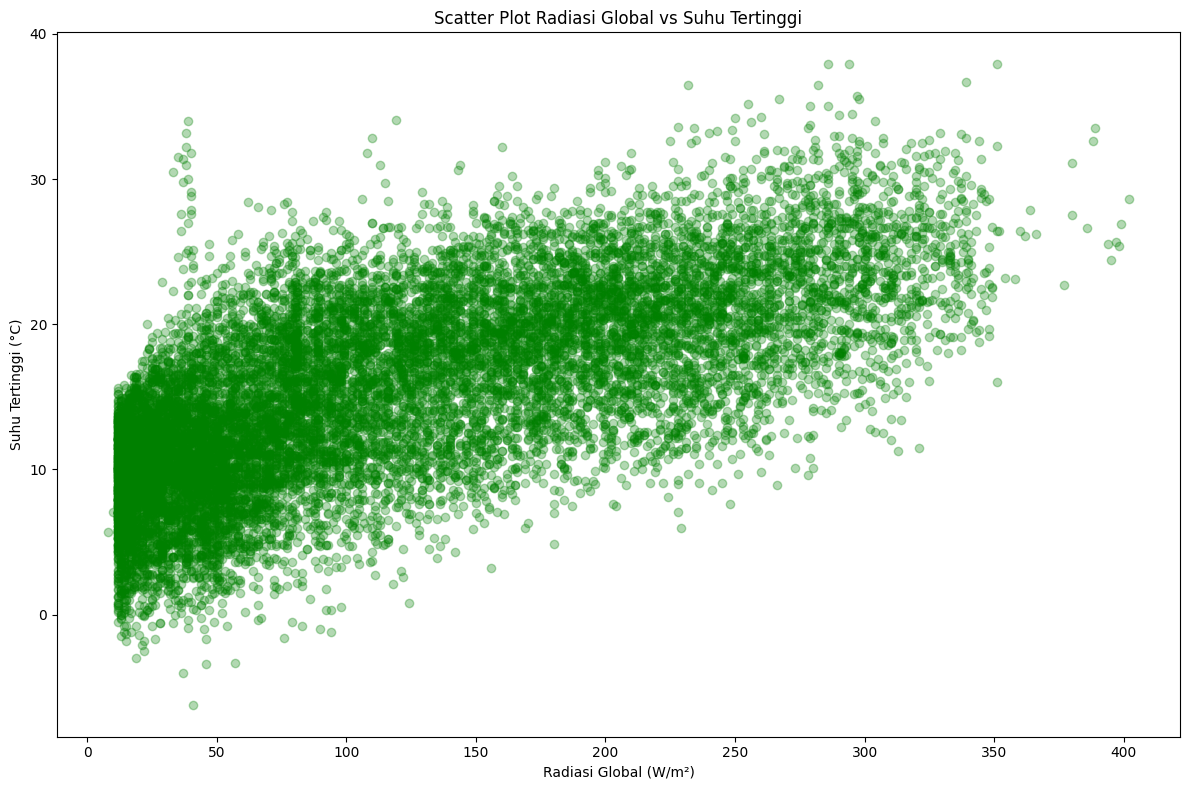

In [137]:
# 4. Scatter Plot (Korelasi antara radiasi global dan suhu tertinggi)
plt.figure(figsize=(12, 8))
plt.scatter(df['radiasi_global'], df['suhu_tertinggi'], color='green', alpha=0.3)  # Alpha untuk transparansi
plt.xlabel('Radiasi Global (W/m²)')
plt.ylabel('Suhu Tertinggi (°C)')
plt.title('Scatter Plot Radiasi Global vs Suhu Tertinggi')
plt.tight_layout()
plt.show()

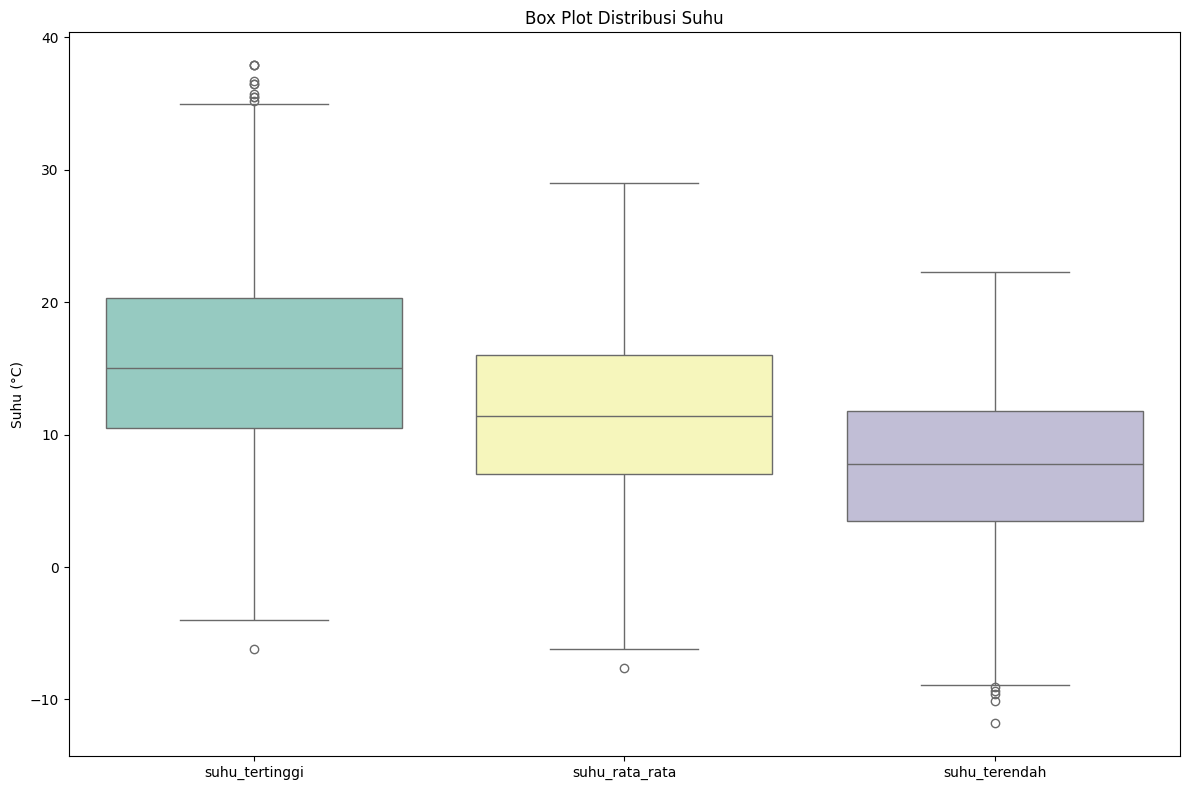

In [138]:
# 5. Box Plot (Distribusi Suhu)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['suhu_tertinggi', 'suhu_rata_rata', 'suhu_terendah']], palette='Set3')
plt.title('Box Plot Distribusi Suhu')
plt.ylabel('Suhu (°C)')
plt.tight_layout()
plt.show()

In [151]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ganti dengan ID file CSV Anda
file_id = '/content/gdrive/MyDrive/Datamining/'  # Ganti dengan ID file Google Drive Anda
url = f'https://drive.google.com/file/d/18Qugz_10X4utsNRdvqVmquOYFZ8jrkL_/view?usp=drive_link'

# Membaca data dari CSV
df = pd.read_csv(path + 'london_weather.csv')

# Menampilkan beberapa data awal untuk verifikasi
print("Data Awal:")
print(df.head())

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data
# Memilih kolom yang ingin dinormalisasi
# Misalnya kita akan menormalkan kolom 'tutupan awan' dan 'cahaya_matahari'
scaled_data = scaler.fit_transform(df[['cloud_cover', 'sunshine']])  # Ganti dengan nama kolom yang sesuai

# Menambahkan data yang dinormalisasi ke DataFrame
df[['tutupan awan_scaled', 'cahaya_matahari_scaled']] = scaled_data

# Menampilkan DataFrame setelah normalisasi
print("\nData setelah Normalisasi:")
print(df.head())

Data Awal:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Data setelah Normalisasi:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7     

In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ganti dengan ID file CSV Anda
file_id = '/content/gdrive/MyDrive/Datamining/'  # Ganti dengan ID file Google Drive Anda
url = f'https://drive.google.com/file/d/18Qugz_10X4utsNRdvqVmquOYFZ8jrkL_/view?usp=drive_link'

# Membaca data dari CSV
df = pd.read_csv(path + 'london_weather.csv')

# Menampilkan beberapa data awal untuk verifikasi
print("Data Awal:")
print(df.head())

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Normalisasi data
# Memilih kolom yang ingin dinormalisasi
# Misalnya kita akan menormalkan kolom 'tutupan awan' dan 'cahaya_matahari'
scaled_data = scaler.fit_transform(df[['cloud_cover', 'sunshine']])  # Ganti dengan nama kolom yang sesuai

# Menambahkan data yang dinormalisasi ke DataFrame
df[['tutupan awan_scaled', 'cahaya_matahari_scaled']] = scaled_data

# Menampilkan DataFrame setelah normalisasi
print("\nData setelah Normalisasi:")
print(df.head())

Data Awal:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Data setelah Normalisasi:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7     

In [154]:
import pandas as pd

# Ganti dengan ID file CSV Anda
file_id = '/content/gdrive/MyDrive/Datamining/'  # Ganti dengan ID file Google Drive Anda
url = f'https://drive.google.com/file/d/18Qugz_10X4utsNRdvqVmquOYFZ8jrkL_/view?usp=drive_link'

# Membaca data dari CSV
df = pd.read_csv(path + 'london_weather.csv')

# Menampilkan beberapa data awal untuk verifikasi
print("Data Awal:")
print(df.head())

# Menentukan faktor penggeseran (Scaling factor),
# misalnya 1000 untuk mengubah ke rentang 0-1
scaling_factor = 1000

# Melakukan scaling data
scaled_data = df = pd.read_csv(path + 'london_weather.csv') / scaling_factor

# Normalisasi data
# Memilih kolom yang ingin dinormalisasi
# Misalnya kita akan menormalkan kolom 'tutupan awan' dan 'cahaya_matahari'
scaled_data = scaler.fit_transform(df[['pressure']])  # Ganti dengan nama kolom yang sesuai

# Menambahkan data yang dinormalisasi ke DataFrame
df[['pressure']] = scaled_data

# Menampilkan DataFrame setelah normalisasi
print("\nData setelah Normalisasi:")
print(df.head())

Data Awal:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Data setelah Normalisasi:
        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790.101        0.002    0.0070             0.052    0.0023    -0.0041   
1  19790.102        0.006    0.0017  